## *Import Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

### *Load Dataset*

In [8]:
df = pd.read_csv('C:/Users/PC/Desktop/Car-Price-Proyect/data/cars.csv')

# **EDA**

In [9]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Ford


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64132 entries, 0 to 64131
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         64132 non-null  object 
 1   year          64132 non-null  int64  
 2   price         64132 non-null  int64  
 3   transmission  64132 non-null  object 
 4   mileage       64132 non-null  int64  
 5   fuelType      64132 non-null  object 
 6   tax           64132 non-null  int64  
 7   mpg           64132 non-null  float64
 8   engineSize    64132 non-null  float64
 9   manufacturer  64132 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.9+ MB


In [11]:
sns.set_style('whitegrid')

## *Which Vehicle Manufacturer has a Higher Average Price?*

In [12]:
serie_mean_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending = True)

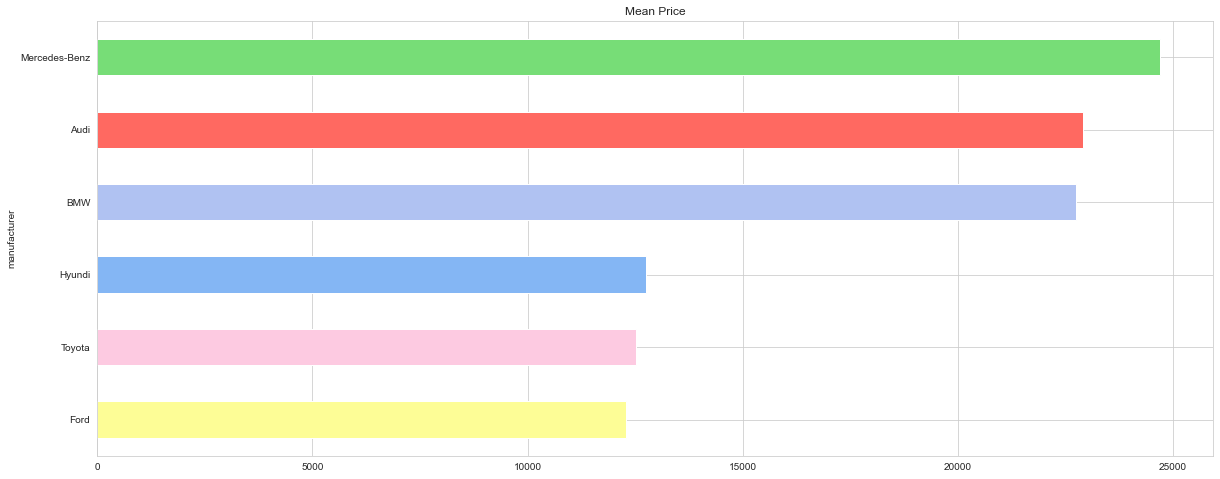

In [13]:
fig = plt.subplots(1,1,figsize = (20,8))
_= serie_mean_price.plot(kind = 'barh',title = 'Mean Price',
                         color = ['#fdfd96','#fdcae1','#84b6f4','#b0c2f2','#ff6961','#77dd77'])

Mercedes Benz for this dataset is the vehicle manufacturer with a higher average price. It is not surprising since it is a manufacturer of high prestige vehicles just like BMW and Audi.

### *Average of Each Vehicle According to the Manufacturer*

In [14]:
ford = df.query("manufacturer == 'Ford'")
toyota = df.query("manufacturer == 'Toyota'")
hyundi = df.query("manufacturer == 'Hyundi'")

In [15]:
audi = df.query("manufacturer == 'Audi'")
bmw = df.query("manufacturer == 'BMW'")
mercedes = df.query("manufacturer == 'Mercedes-Benz'")

In [16]:
def Barplot(subset):
    serie = subset.groupby('model')['price'].mean().sort_values(ascending = True)
    fig = plt.subplots(1,1,figsize = (20,8))
    serie.plot(kind = 'barh',color = ['#fdfd96','#fdcae1','#84b6f4','#b0c2f2','#ff6961','#77dd77'])

#### *Ford*

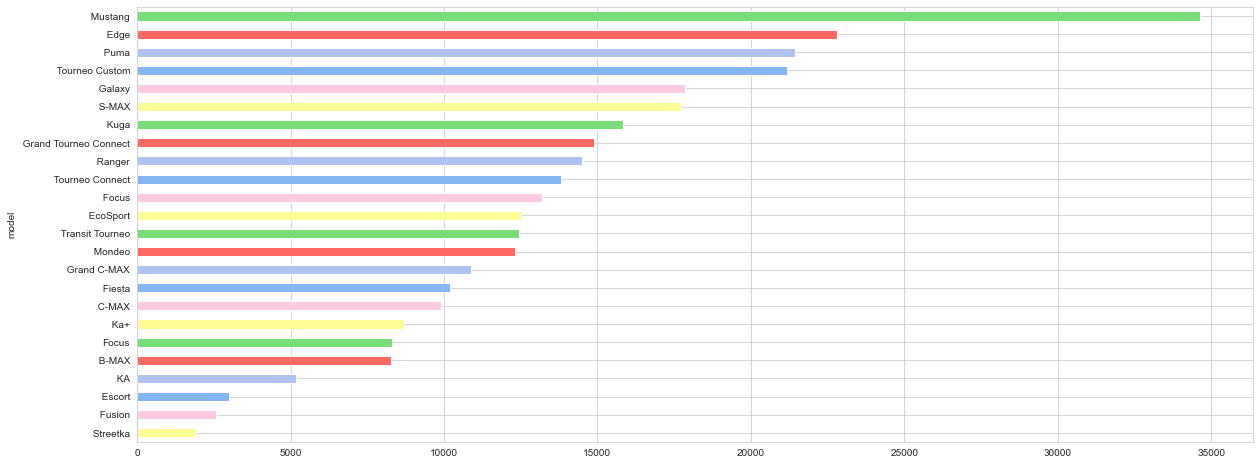

In [17]:
_ = Barplot(ford)

#### *Toyota*

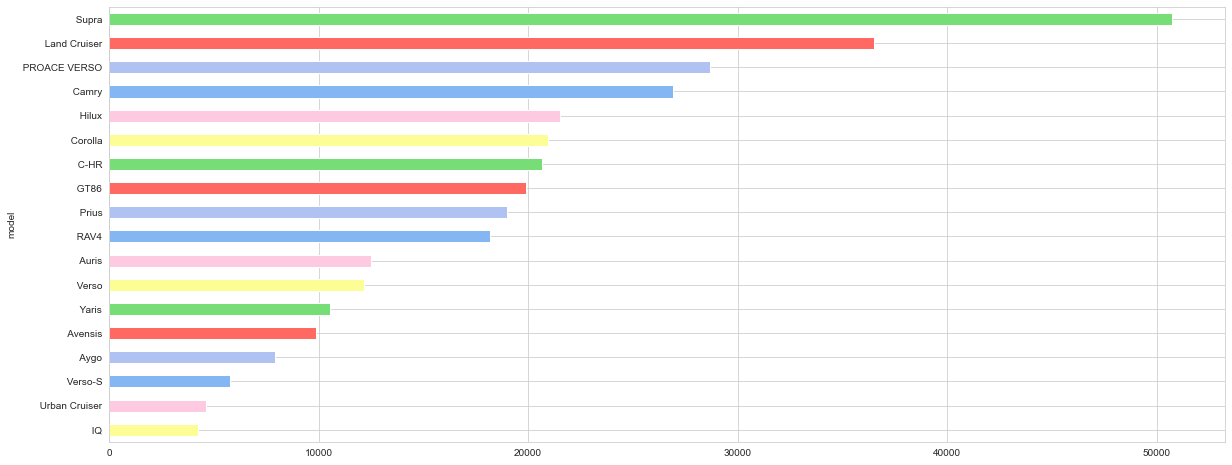

In [18]:
_ = Barplot(toyota)

#### *Hyundi*

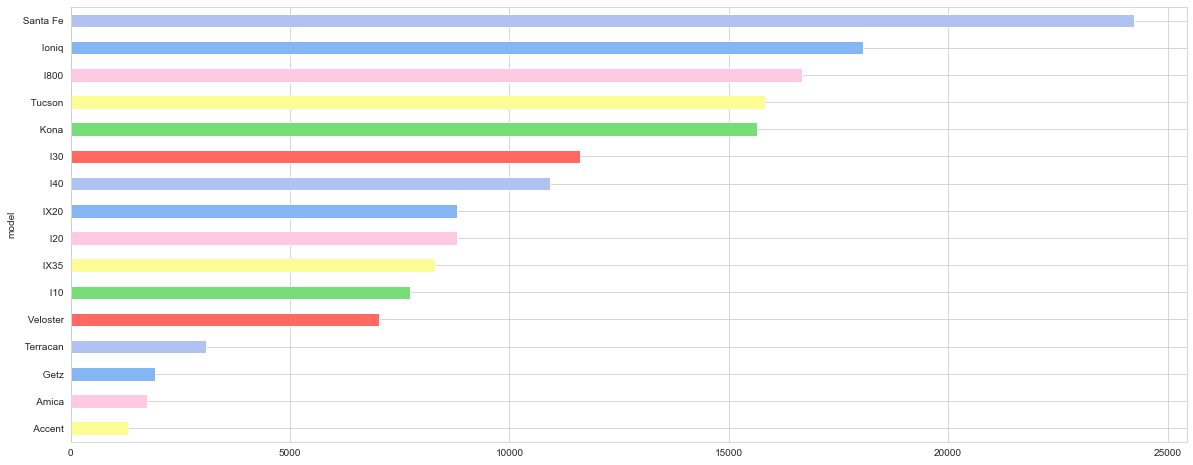

In [19]:
_ = Barplot(hyundi)

#### *Audi*

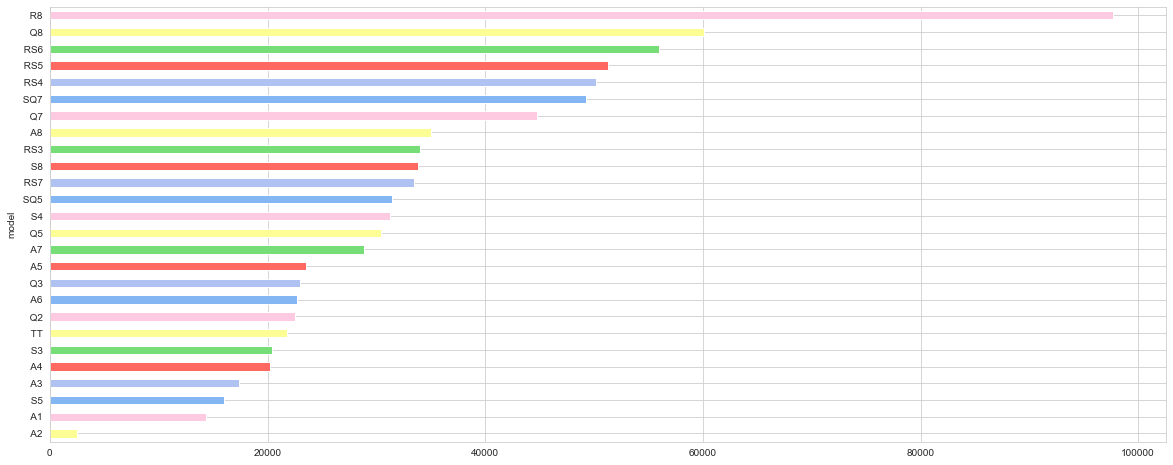

In [20]:
_ = Barplot(audi)

#### *BMW*

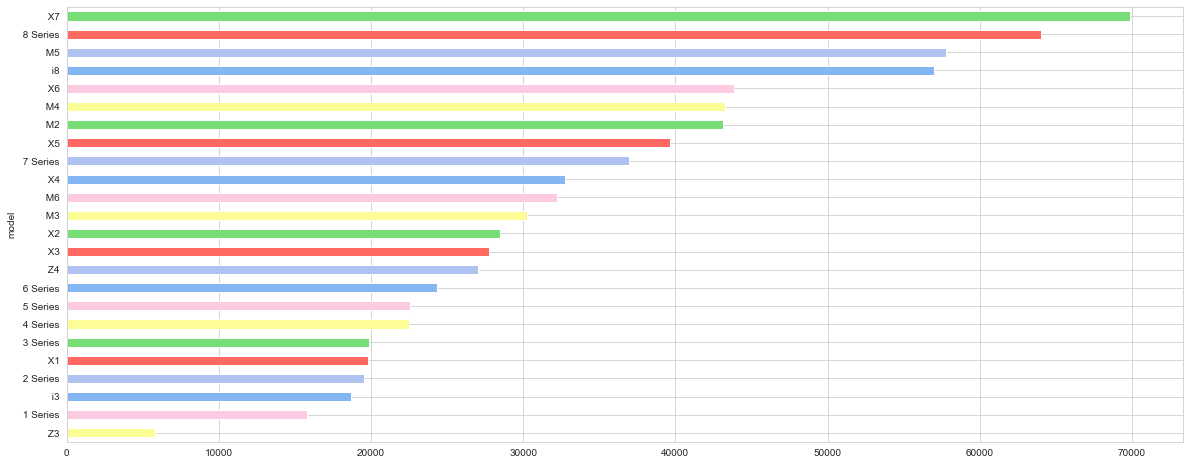

In [21]:
_ = Barplot(bmw)

#### *Mercedes Venz*

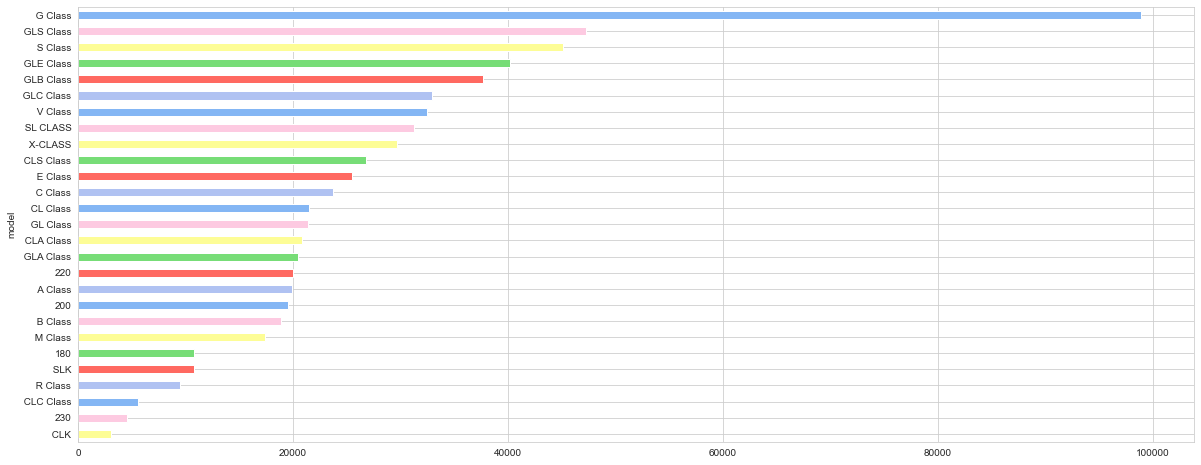

In [22]:
_ = Barplot(mercedes)

### *Average MPG Based on Engine Size*

In [23]:
engine_size_serie = df.groupby('engineSize')['mpg'].mean().sort_values(ascending = True)

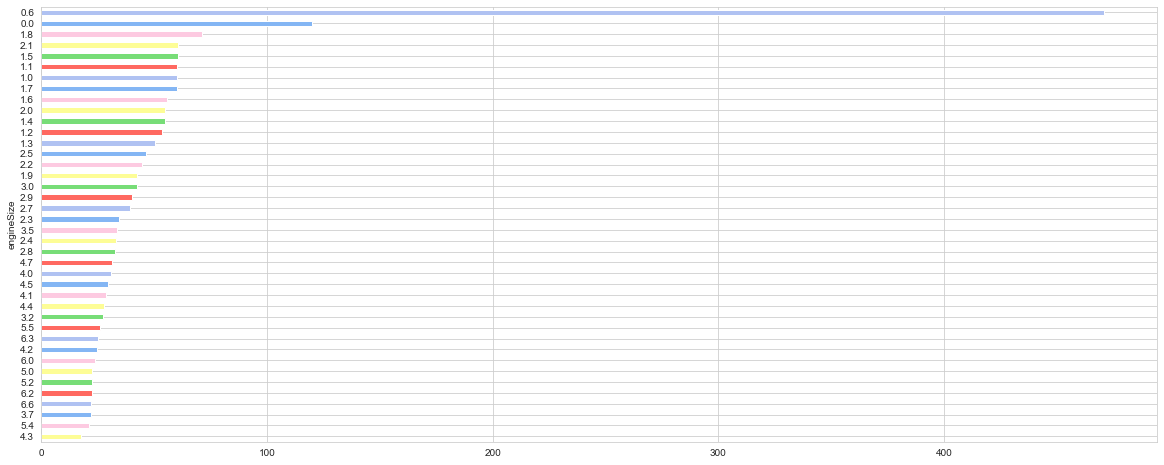

In [24]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = engine_size_serie.plot(kind = 'barh',
                           color = ['#fdfd96','#fdcae1','#84b6f4',
                                     '#b0c2f2','#ff6961','#77dd77'])

Generally vehicles with a smaller Engine Size have a better MPG consumption.Because the engine has more power.

## *Average Price by Fuel Type*

In [31]:
serie_mpg = df.groupby("fuelType")["price"].mean().sort_values(ascending = True)

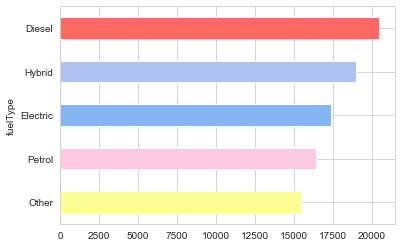

In [32]:
_ = serie_mpg.plot(kind = "barh",color =['#fdfd96','#fdcae1','#84b6f4',
                                     '#b0c2f2','#ff6961','#77dd77'])

Vehicles with a diesel or hybrid fuel type are more expensive. Due to better fuel consumption efficiency.

### *Matrix Correlation Plot*

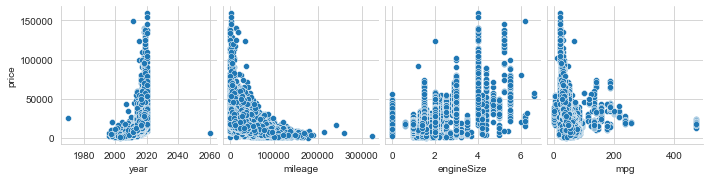

In [33]:
_ = sns.pairplot(data = df,x_vars = ['year','mileage','engineSize','mpg'],y_vars = ['price'])

* **Year**: It has a high relationship with the price. Since generally a newer model will be more expensive.




* **Mileage**: A vehicle with more miles decreases the price of the vehicle. Since more wear will be generated.




* **Engine Size**: Generally luxury vehicles have a more powerful engine than low-end vehicles.

A clear outlier is presented for the Year variable. Since there are no vehicles that have a manufacturing date of the year 2060. Perhaps it is a failure to collect the data.

## *Histogram*

In [34]:
def Histogram(x):
    
    fig,ax = plt.subplots(1,1,figsize = (20,8))
    ax.set_title(x)
    sns.histplot(data = df,x = x,color = 'c',ax = ax,kde = True)

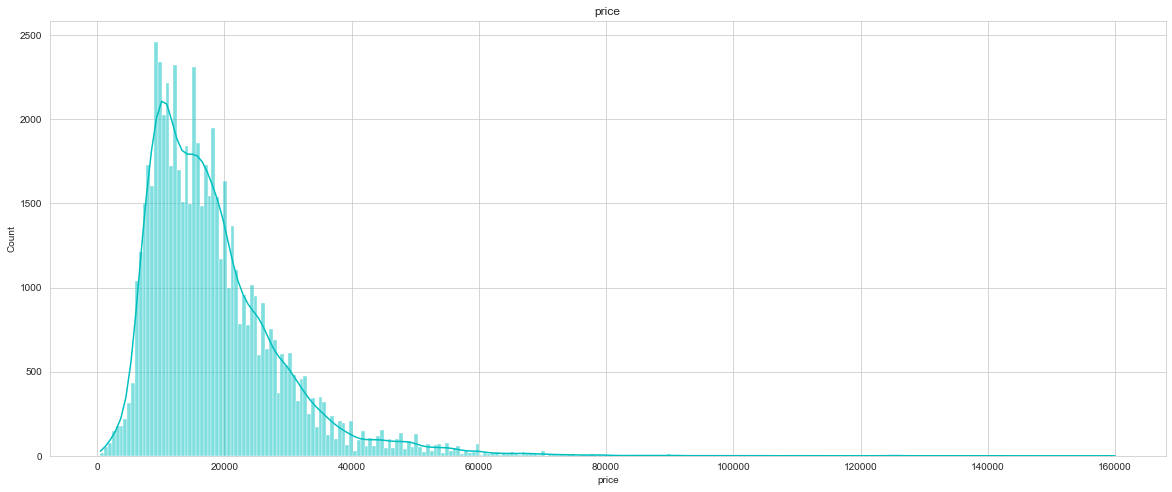

In [35]:
_ = Histogram('price')

There are vehicles that have an atmospheric price. However, we cannot eliminate them, since they may be high-end vehicles such as BMW, Audi or Mercedes-Benz.

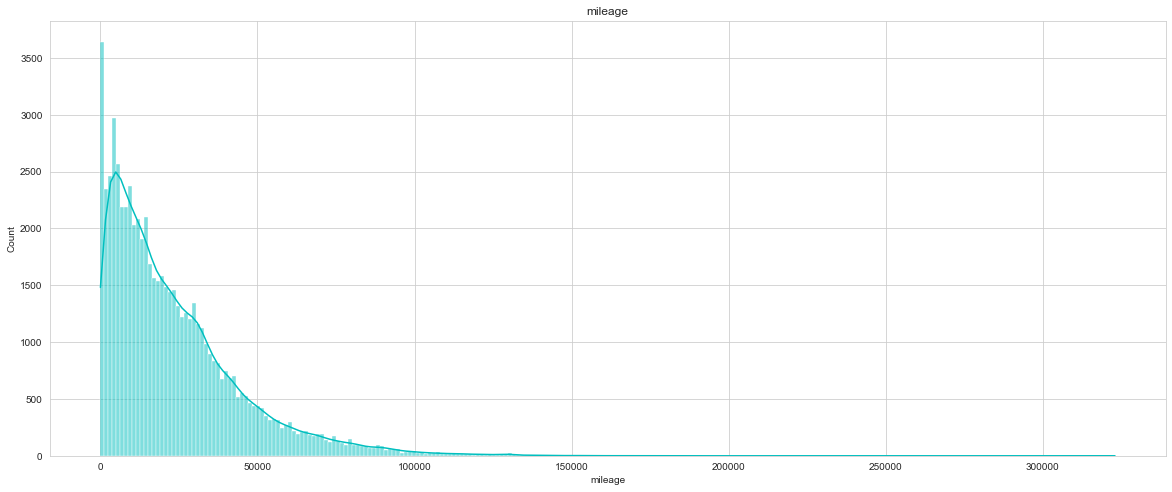

In [36]:
_ = Histogram('mileage')

There are vehicles that have an exaggeratedly low mileage, almost 0 miles. In addition, there are vehicles that have enough miles traveled.

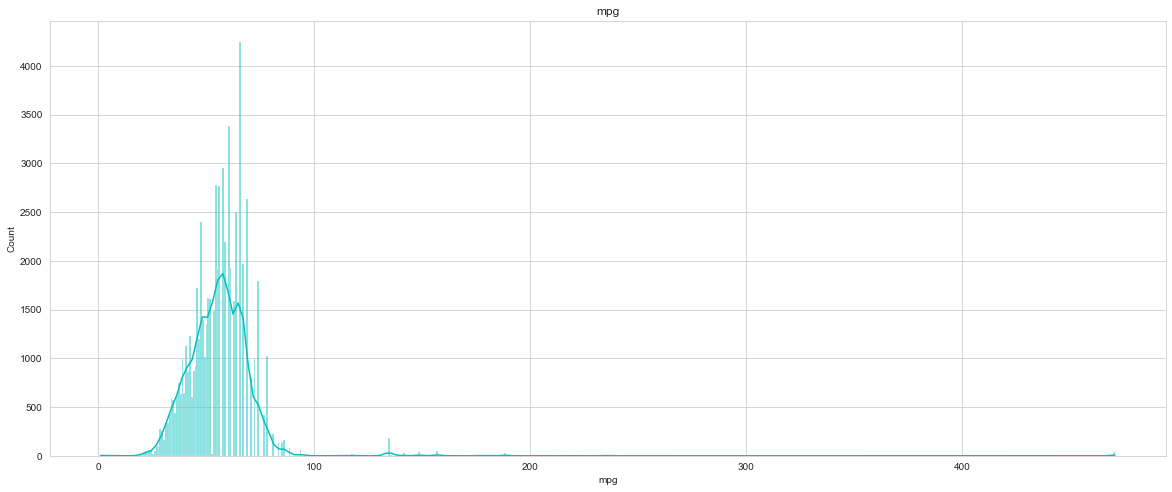

In [37]:
_ = Histogram('mpg')

Most vehicles have an mpg greater than 20. In the higher MPG values, they are probably cars whose fuel type is hybrid or electric.

## *Pie Plot*

In [38]:
def PiePlot(feature):
    serie = df[feature].value_counts()
    fig = plt.subplots(1,1,figsize = (22,8))
    serie.plot(kind = 'pie',colors = ['#fdfd96','#fdcae1',
                                      '#84b6f4','#b0c2f2',
                                      '#ff6961','#77dd77'],
               autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))
    
    plt.ylabel(None)

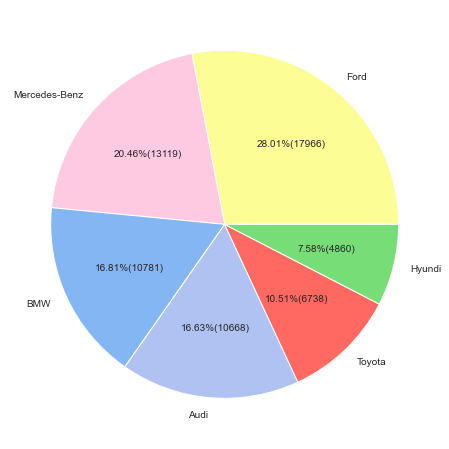

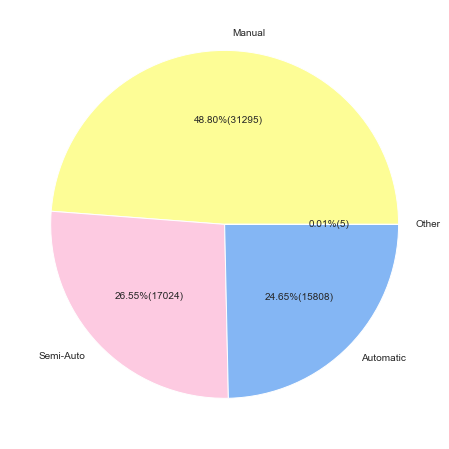

In [39]:
for column in ['manufacturer','transmission']:
    
    _ = PiePlot(column)

In the second graph there are very few observations with "Other" transmissions. Which is almost non-existent, it is best to remove them as they can bias the model.

## *Value Counts*

In [40]:
df.engineSize.value_counts().sort_values(ascending = True)

6.3        1
4.5        1
5.4        1
4.3        1
4.1        2
3.7        2
6.0        2
6.6        2
0.6        7
2.7        8
1.9        9
6.2       13
3.5       20
5.2       23
4.7       24
3.2       24
4.2       26
2.8       38
5.5       44
5.0       52
2.4       72
4.4       79
2.3      153
2.9      171
0.0      220
4.0      357
2.2      446
2.5      452
1.1      566
1.7      755
1.3     1332
1.8     1563
1.4     2058
1.2     2755
2.1     4018
1.6     4240
3.0     4997
1.5     8723
1.0    11463
2.0    19412
Name: engineSize, dtype: int64

In [41]:
df.model.value_counts(ascending = True)

 RS7                   1
230                    1
Focus                  1
 Transit Tourneo       1
 Escort                1
                    ... 
 3 Series           2443
 A Class            2561
 C Class            3747
 Focus              4588
 Fiesta             6557
Name: model, Length: 135, dtype: int64

The categories that appear less than 10 times in the data set, we can eliminate them. Since we prevent the model from learning unique patterns.

## **Conclusion**

The dataset has several outliers for example with the following variables:

* Year: There is a value that has a manufacturing date that is equal to the year 2060. Something that is illogical, it was probably a registry error.



* Mileage: There are vehicles that have a mile traveled, something that is very rare to happen. These observations probably made some modifications to the odometer so that this number of miles traveled would appear. Normally, pre-owned vehicles have at least 3,000 miles of travel with the vehicle as a minimum.



* We would have to check the price according to the brand. Since, for example, brands such as BMW or Audi are manufacturers of luxury automobiles.



We must also be careful with values that appear less than 10 times. Since the model can be skewed, so it will be better to eliminate them.